In [1]:
import torch
from torch.autograd import Variable
%matplotlib inline
import matplotlib.pyplot as plt

## Variables are tensors that can have their gradients calculated 

In [2]:
v = torch.rand(5) * 10
x = Variable(v, requires_grad=True)
print(x, type(x))

Variable containing:
 5.8270
 2.3339
 9.2495
 2.4208
 5.7055
[torch.FloatTensor of size 5]
 <class 'torch.autograd.variable.Variable'>


## Lets create a line to learn

In [3]:
lin = Variable(torch.FloatTensor(list(range(5))))
target =  lin * 2 + 1  # y = 2x + 1

## We can calculate the loss between our line and a random vector

In [4]:
# loss using MSE
loss = (target-x).pow(2).sum() / x.size(0)
print(loss)

Variable containing:
 14.7248
[torch.FloatTensor of size 1]



## Backpropogate the error
calling `.backward()` on a Variable that has been computed backpropogates the error for all parent variables that require gradients

In [5]:
loss.backward()

## Gradients of x

In [6]:
x.grad.data


 1.9308
-0.2664
 1.6998
-1.8317
-1.3178
[torch.FloatTensor of size 5]

## Plot of target, random line, dx/dtarget

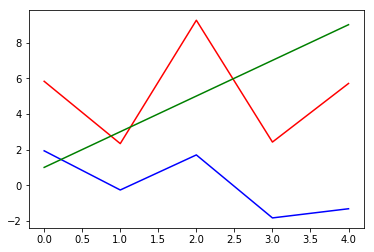

In [7]:
plt.plot(x.data.numpy(), color="red")
plt.plot(x.grad.data.numpy(), color="blue")
plt.plot(target.data.numpy(), color="green")

## Update the x Variable and zero the gradients on x

In [8]:
lr = .1
x.data -= lr * x.grad.data
x.grad.data.zero_()


 0
 0
 0
 0
 0
[torch.FloatTensor of size 5]

## Plot of x and target after the update

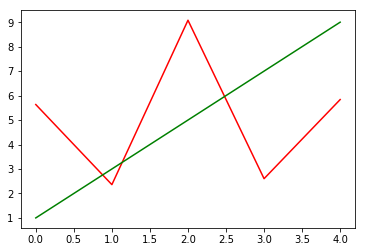

In [9]:
plt.plot(x.data.numpy(), color="red")
plt.plot(target.data.numpy(), color="green")

## Basic Gradient Decent by hand

epoch: 0 loss:67.85208892822266
epoch: 1 loss:43.42534255981445
epoch: 2 loss:27.792217254638672
epoch: 3 loss:17.787019729614258
epoch: 4 loss:11.383691787719727
epoch: 5 loss:7.285562038421631
epoch: 6 loss:4.662759304046631
epoch: 7 loss:2.984166145324707
epoch: 8 loss:1.909866213798523
epoch: 9 loss:1.2223145961761475
epoch: 10 loss:0.7822818160057068
epoch: 11 loss:0.5006605386734009
epoch: 12 loss:0.3204224407672882
epoch: 13 loss:0.20507021248340607
epoch: 14 loss:0.1312449872493744
epoch: 15 loss:0.0839969739317894
epoch: 16 loss:0.05375806242227554
epoch: 17 loss:0.03440515697002411
epoch: 18 loss:0.022019295021891594
epoch: 19 loss:0.014092342928051949
epoch: 20 loss:0.009019099175930023
epoch: 21 loss:0.005772233474999666
epoch: 22 loss:0.0036942174192517996
epoch: 23 loss:0.0023643120657652617
epoch: 24 loss:0.001513176248408854
epoch: 25 loss:0.0009684514370746911
loss is now less than 0.001!


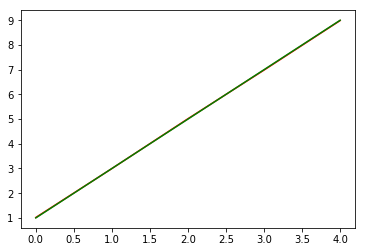

In [10]:
lr = .1
for i in range(100):

    loss = (target-x).pow(2).sum()
    print('epoch: {} loss:{}'.format(i, loss.data[0]))
    if loss.data[0] < 0.001:  # break if pretty close
        print('loss is now less than 0.001!')
        break

    loss.backward()
    x.data = x.data - (lr * x.grad.data)

    x.grad.data.zero_()

plt.plot(x.data.numpy(), color="red")
plt.plot(target.data.numpy(), color="green")
plt.show()
    


## Using built in optimizers

In [11]:
import torch.optim as optim

In [12]:
x = Variable(torch.rand(5) * 10, requires_grad=True)
lin = Variable(torch.FloatTensor(list(range(5))))
target =  lin * 2 + 1  # y = 2x + 1

All optimizers base off of `torch.optim.Optimizer` and only need to implement `__init__` and `step()`, and maintain the convention of `params` and `lr` being the first two constructor parameters.

This means its really easy to use different optimizers for models, you just change one line

In [13]:
# optimizers all take an iterable of things to update, lr is usually optional
# try a few out!

optimizer = optim.SGD([x], lr=0.1)
# optimizer = optim.Adam([x], lr=0.1)
# optimizer = optim.RMSprop([x], lr=.1)
# optimizer = optim.Adamax([x], lr=.1)

epoch: 0 loss:37.750083923339844
epoch: 1 loss:24.160057067871094
epoch: 2 loss:15.46243667602539
epoch: 3 loss:9.89595890045166
epoch: 4 loss:6.333414077758789
epoch: 5 loss:4.053383827209473
epoch: 6 loss:2.594165563583374
epoch: 7 loss:1.6602652072906494
epoch: 8 loss:1.0625698566436768
epoch: 9 loss:0.6800445914268494
epoch: 10 loss:0.4352286756038666
epoch: 11 loss:0.2785465121269226
epoch: 12 loss:0.17826984822750092
epoch: 13 loss:0.11409251391887665
epoch: 14 loss:0.07301920652389526
epoch: 15 loss:0.046732403337955475
epoch: 16 loss:0.029908811673521996
epoch: 17 loss:0.019141709432005882
epoch: 18 loss:0.01225076150149107
epoch: 19 loss:0.007840456441044807
epoch: 20 loss:0.005017839837819338
epoch: 21 loss:0.0032114076893776655
epoch: 22 loss:0.002055322751402855
epoch: 23 loss:0.0013154298067092896
epoch: 24 loss:0.0008418791694566607
loss is now less than 0.001!


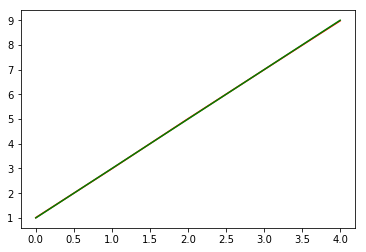

In [14]:
for i in range(1000):
    loss = (target-x).pow(2).sum()
    print('epoch: {} loss:{}'.format(i, loss.data[0]))
    if loss.data[0] < 0.001:  # break if pretty close
        print('loss is now less than 0.001!')
        break
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

plt.plot(x.data.numpy(), color="red")
plt.plot(target.data.numpy(), color="green")
plt.show()